# CGM graph

## Setup

In [8]:
import sys
sys.path.append("../")

from src.components.utils import (
    process_entries,
    process_treatments
)
from matplotlib import pyplot as plt
from matplotlib import dates as md

In [9]:
entries = process_entries("../data/entries.json")
treatments = process_treatments("../data/treatments.json")
df = treatments.combine_first(entries)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14097 entries, 2022-12-12 05:45:00 to 2023-01-30 04:25:00
Freq: 5T
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   basal     9440 non-null   float64
 1   bolus     1107 non-null   float64
 2   cal       6149 non-null   float64
 3   carbs     316 non-null    float64
 4   duration  5447 non-null   float64
 5   glucose   13432 non-null  float64
 6   rate      5178 non-null   float64
dtypes: float64(7)
memory usage: 881.1 KB


## Line Graph

In [10]:
# see the possible range of dates
df.index.min(), df.index.max()

(Timestamp('2022-12-12 05:45:00'), Timestamp('2023-01-30 04:25:00'))

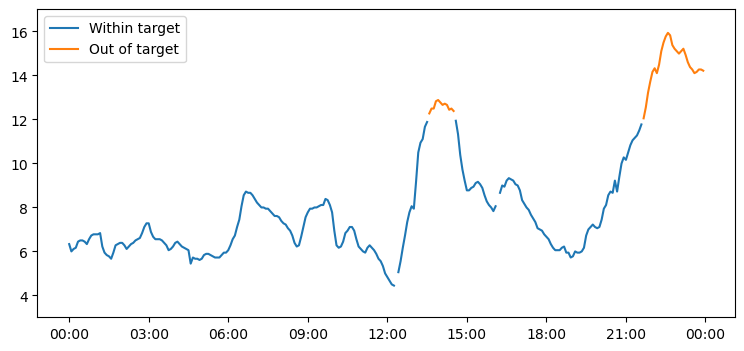

In [12]:
# variables
DATE = "2022-12-16"
RANGE_LOWER = 3.9
RANGE_UPPER = 12

# preprocessing
data = df.loc[DATE, "glucose"]
mask = (data > RANGE_LOWER) & (data < RANGE_UPPER)

# xticks formatter
formatter = md.DateFormatter("%H:%M")

ylim_upper = (data.max() + 1).round()
ylim_lower = (data.min() - 1).round()

fig, ax = plt.subplots(figsize=(9, 4))

in_range = data[mask].resample("5min").max()
out_of_range = data[~mask].resample("5min").max()

ax.plot(in_range)
ax.plot(out_of_range)
ax.xaxis.set_major_formatter(formatter)
ax.set(ylim=[ylim_lower, ylim_upper])
ax.legend(["Within target", "Out of target"]);